In [53]:
#import libraries for tensorflow model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [54]:
#generating the size and the dataset using random numbers
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

#combining both the weights using numpy techniques
generated_inputs = np.column_stack((xs,zs))

#adding small noise in the targets
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro_1', inputs=generated_inputs, targets=generated_targets)

print(generated_inputs)
print(generated_targets)

[[ 8.85612995  0.08874773]
 [-5.28618089 -6.48236378]
 [ 7.10660871  8.83907212]
 ...
 [ 8.75448709 -5.47850564]
 [-6.9468123  -5.76488071]
 [-0.85417695  2.68815216]]
[[ 2.26721377e+01]
 [ 1.40118989e+01]
 [-6.51458848e+00]
 [ 6.69028404e+00]
 [ 2.17032475e+00]
 [ 3.64628543e+01]
 [ 2.18182128e+00]
 [ 2.42880112e+01]
 [ 2.19564574e+01]
 [-1.39797681e+01]
 [ 1.81827107e+01]
 [ 3.62622937e+01]
 [ 2.03188452e+01]
 [ 4.00983076e+01]
 [-2.93486430e+01]
 [ 2.62601567e+01]
 [ 2.61152295e+01]
 [-2.05812603e+01]
 [-6.50018965e+00]
 [ 2.13852485e+01]
 [ 6.18334022e+00]
 [ 3.83768599e+01]
 [ 2.56792926e+01]
 [ 1.30042761e+01]
 [ 1.97560950e+01]
 [-1.31395523e+01]
 [-1.20023504e+01]
 [-8.03141532e+00]
 [-6.19774351e+00]
 [-2.68299729e+01]
 [-4.16780249e+00]
 [ 1.50564151e+01]
 [-3.23476600e+01]
 [ 2.44727343e+01]
 [ 1.86404747e+01]
 [-1.06352856e+01]
 [-5.89896863e+00]
 [-4.43027491e+00]
 [ 9.89504220e+00]
 [ 1.82640784e+01]
 [ 1.65710147e+01]
 [ 3.00155178e+01]
 [ 3.44608092e+01]
 [ 1.20048173e+

In [55]:
#loading dataset for training 
training_data = np.load('TF_intro_1.npz')

#declare variable to store input and output size
input_size = 2
output_size = 1

#defining model
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                   kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), 
                                                   bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=custom_optimizer, loss='huber_loss')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 13.7776
Epoch 2/100
32/32 - 0s - loss: 7.8304
Epoch 3/100
32/32 - 0s - loss: 4.5810
Epoch 4/100
32/32 - 0s - loss: 4.0077
Epoch 5/100
32/32 - 0s - loss: 3.6568
Epoch 6/100
32/32 - 0s - loss: 3.3177
Epoch 7/100
32/32 - 0s - loss: 2.9819
Epoch 8/100
32/32 - 0s - loss: 2.6439
Epoch 9/100
32/32 - 0s - loss: 2.3203
Epoch 10/100
32/32 - 0s - loss: 2.0190
Epoch 11/100
32/32 - 0s - loss: 1.7197
Epoch 12/100
32/32 - 0s - loss: 1.4264
Epoch 13/100
32/32 - 0s - loss: 1.1332
Epoch 14/100
32/32 - 0s - loss: 0.8625
Epoch 15/100
32/32 - 0s - loss: 0.6392
Epoch 16/100
32/32 - 0s - loss: 0.4739
Epoch 17/100
32/32 - 0s - loss: 0.3571
Epoch 18/100
32/32 - 0s - loss: 0.2809
Epoch 19/100
32/32 - 0s - loss: 0.2323
Epoch 20/100
32/32 - 0s - loss: 0.2047
Epoch 21/100
32/32 - 0s - loss: 0.1890
Epoch 22/100
32/32 - 0s - loss: 0.1802
Epoch 23/100
32/32 - 0s - loss: 0.1750
Epoch 24/100
32/32 - 0s - loss: 0.1716
Epoch 25/100
32/32 - 0s - loss: 0.1703
Epoch 26/100
32/32 - 0s - loss: 0

In [56]:
#extracting the weights and biases
print(model.layers[0].get_weights())
weights = model.layers[0].get_weights()[0]
print(weights)
bias = model.layers[0].get_weights()[1]
print(bias)

[array([[ 1.989338],
       [-2.9909  ]], dtype=float32), array([4.9994445], dtype=float32)]
[[ 1.989338]
 [-2.9909  ]]
[4.9994445]


In [57]:
#predictions and extracting outputs
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than our original training data
print(model.predict_on_batch(training_data['inputs']).round(1))

# If we display our targets (actual observed values), we can manually compare the outputs and the targets
training_data['targets'].round(1)

[[ 22.4]
 [ 13.9]
 [ -7.3]
 [  6.5]
 [  2.8]
 [ 36.5]
 [  2.5]
 [ 23.4]
 [ 22.1]
 [-13.7]
 [ 18.7]
 [ 35.2]
 [ 19.8]
 [ 40.5]
 [-30.1]
 [ 25.8]
 [ 26.3]
 [-20.8]
 [ -5.9]
 [ 21.2]
 [  6.1]
 [ 38.6]
 [ 25. ]
 [ 13.7]
 [ 19.9]
 [-12.4]
 [-11.1]
 [ -8.1]
 [ -6.1]
 [-25.9]
 [ -4.5]
 [ 15.9]
 [-32. ]
 [ 24.7]
 [ 18.7]
 [-11.5]
 [ -6.6]
 [ -4.1]
 [  9.6]
 [ 18.6]
 [ 17.3]
 [ 29.7]
 [ 34.8]
 [ 11.1]
 [-12.4]
 [ -6.5]
 [ 15.1]
 [ 17.5]
 [ 30. ]
 [ -1.6]
 [-21.4]
 [ 22.3]
 [ 23.8]
 [  7.2]
 [ 11.1]
 [ 19.5]
 [  7.5]
 [  2.9]
 [-10.9]
 [ -3.9]
 [  9.7]
 [ -3.3]
 [-22.7]
 [ -9.7]
 [-36.9]
 [ -7.3]
 [  2.2]
 [-31.3]
 [ -0. ]
 [  2.2]
 [ -4.6]
 [ 18.6]
 [-16.9]
 [-18.1]
 [ -0.5]
 [  5.1]
 [ 10.7]
 [-11.8]
 [  9.5]
 [ 16.9]
 [ 15.7]
 [ -6.3]
 [ 13.5]
 [ 47.5]
 [ -8.1]
 [ -4.6]
 [  3.6]
 [-34.4]
 [ 13.4]
 [ -2.8]
 [ -7.3]
 [-13. ]
 [ -4. ]
 [ -9.7]
 [-20.8]
 [ 12.9]
 [ 20.3]
 [ 29.2]
 [ 25. ]
 [ 33.7]
 [ 14.8]
 [ -9.8]
 [ 28.8]
 [-15. ]
 [  2.5]
 [ 18.2]
 [  5.9]
 [-31.2]
 [-11.6]
 [  2.8]
 [ 21.7]
 

array([[ 22.7],
       [ 14. ],
       [ -6.5],
       [  6.7],
       [  2.2],
       [ 36.5],
       [  2.2],
       [ 24.3],
       [ 22. ],
       [-14. ],
       [ 18.2],
       [ 36.3],
       [ 20.3],
       [ 40.1],
       [-29.3],
       [ 26.3],
       [ 26.1],
       [-20.6],
       [ -6.5],
       [ 21.4],
       [  6.2],
       [ 38.4],
       [ 25.7],
       [ 13. ],
       [ 19.8],
       [-13.1],
       [-12. ],
       [ -8. ],
       [ -6.2],
       [-26.8],
       [ -4.2],
       [ 15.1],
       [-32.3],
       [ 24.5],
       [ 18.6],
       [-10.6],
       [ -5.9],
       [ -4.4],
       [  9.9],
       [ 18.3],
       [ 16.6],
       [ 30. ],
       [ 34.5],
       [ 12. ],
       [-13.2],
       [ -5.9],
       [ 15.9],
       [ 17.4],
       [ 30.5],
       [ -1. ],
       [-21.3],
       [ 22.5],
       [ 24.8],
       [  7.8],
       [ 11.3],
       [ 20.5],
       [  7.1],
       [  3.2],
       [-11.3],
       [ -3.9],
       [  8.8],
       [ -3.6],
       [

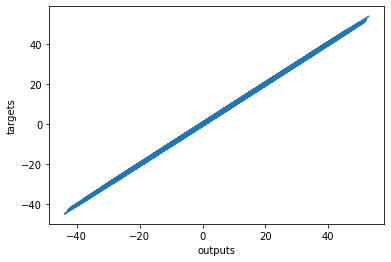

In [58]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# Voila - what you see should be exactly the same as in the previous notebook!
# You probably don't see the point of TensorFlow now - it took us the same number of lines of code
# to achieve this simple result. However, once we go deeper in the next chapter,
# TensorFlow will save us hundreds of lines of code.